> #### <b style="color: #58a491">컨볼루션</b>
> - filters: 출력채널 수(필터 수)
> - kernel_size: 필터 크기
> - stride: 필터 이동 수
> - padding: valid, same
> - activation: 비선형성 가능

> **filter = kernel * n => (8 * 8) * 5**  
> 224 * 224 * 3 => (8 * 8 * 3) * 5 => 219 * 219 * 5 (219 맞나..?)

In [1]:
import tensorflow as tf
from tools.dataset.five_flowers import IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS, CLASS_NAMES, get_datasets

2024-01-25 21:27:35.709703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 21:27:36.418622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Conv2D(256, (5, 5), strides=1,  activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(384, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(384, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

2024-01-25 21:29:19.195291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:29:19.386852: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:29:19.387190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:29:19.388254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-25 21:29:19.388437: I tensorflow/compile

In [3]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [4]:
train_dataset, validation_dataset = get_datasets()

In [5]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10


2024-01-25 21:29:36.569171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-01-25 21:29:37.283304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-01-25 21:29:37.367157: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x41e5dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-25 21:29:37.367195: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-01-25 21:29:37.370578: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-25 21:29:37.454793: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proces

    193/Unknown - 7s 21ms/step - loss: 1.6726 - accuracy: 0.2175

2024-01-25 21:29:43.281597: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 16151289430314278371
2024-01-25 21:29:43.281648: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8876658920017662706


193/193 [==============================] - 9s 27ms/step - loss: 1.6726 - accuracy: 0.2175 - val_loss: 1.6036 - val_accuracy: 0.2075
Epoch 2/10
  7/193 [>.............................] - ETA: 3s - loss: 1.6157 - accuracy: 0.1857

2024-01-25 21:29:44.457297: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14792468047566521899
2024-01-25 21:29:44.457357: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8876658920017662706


193/193 [==============================] - 4s 23ms/step - loss: 1.6055 - accuracy: 0.2164 - val_loss: 1.6036 - val_accuracy: 0.2075
Epoch 3/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6053 - accuracy: 0.2180 - val_loss: 1.6034 - val_accuracy: 0.2075
Epoch 4/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6051 - accuracy: 0.2102 - val_loss: 1.6032 - val_accuracy: 0.2075
Epoch 5/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6050 - accuracy: 0.2066 - val_loss: 1.6032 - val_accuracy: 0.2075
Epoch 6/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6049 - accuracy: 0.2081 - val_loss: 1.6031 - val_accuracy: 0.2075
Epoch 7/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6048 - accuracy: 0.2076 - val_loss: 1.6030 - val_accuracy: 0.2075
Epoch 8/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6047 - accuracy: 0.2123 - val_loss: 1.6030 - val_accuracy: 0.2075
Epoch 9/10

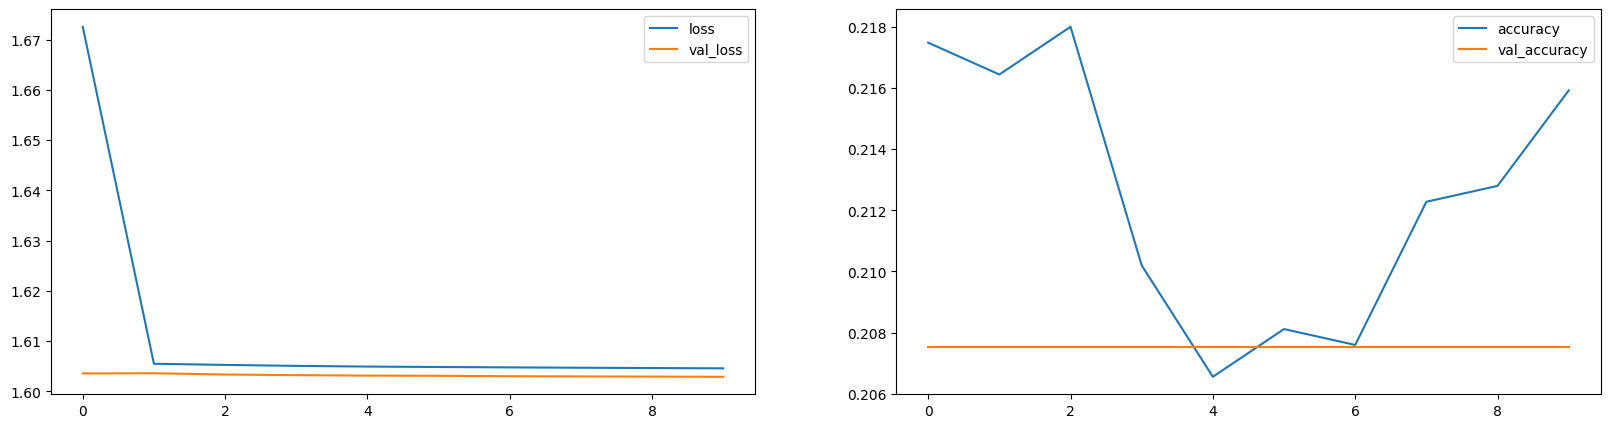

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_history = pd.DataFrame(model.history.history)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0])
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS]),
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation= 'relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense (4096, activation='relu'),
    tf.keras.layers.Dense(len (CLASS_NAMES), activation= 'softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [8]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
193/193 [==============================] - 6s 25ms/step - loss: 1.6461 - accuracy: 0.2102 - val_loss: 1.6035 - val_accuracy: 0.2075
Epoch 2/10
  7/193 [>.............................] - ETA: 3s - loss: 1.6153 - accuracy: 0.1857

2024-01-25 21:32:36.424066: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14792468047566521899


193/193 [==============================] - 5s 23ms/step - loss: 1.6056 - accuracy: 0.2149 - val_loss: 1.6034 - val_accuracy: 0.2075
Epoch 3/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6052 - accuracy: 0.2185 - val_loss: 1.6032 - val_accuracy: 0.2075
Epoch 4/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6051 - accuracy: 0.2128 - val_loss: 1.6032 - val_accuracy: 0.2075
Epoch 5/10
193/193 [==============================] - 4s 23ms/step - loss: 1.6050 - accuracy: 0.2118 - val_loss: 1.6031 - val_accuracy: 0.2075
Epoch 6/10
193/193 [==============================] - 5s 23ms/step - loss: 1.6049 - accuracy: 0.2164 - val_loss: 1.6031 - val_accuracy: 0.2075
Epoch 7/10
193/193 [==============================] - 5s 23ms/step - loss: 1.6048 - accuracy: 0.2164 - val_loss: 1.6031 - val_accuracy: 0.2075
Epoch 8/10
193/193 [==============================] - 5s 23ms/step - loss: 1.6047 - accuracy: 0.2164 - val_loss: 1.6030 - val_accuracy: 0.2075
Epoch 9/10

> #### <b style="color: #58a491">깊이의 연관성</b>
> - 표현력: 단일층 여러개로 비선형성이 증가
> - 일반화: 단일층의 복잡도는 과적합을 발생 -> 여러층은 입력의 의미론적 분해
> - 인식장: 큰 이미지 개체도 여러층을 사용하면 작은 필터로 볼수 있게 된다. 뭔소리야

In [9]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=[IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense (4096, activation='relu'),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation= 'softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [10]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
    193/Unknown - 25s 100ms/step - loss: 1.6087 - accuracy: 0.2170

2024-01-25 21:34:09.243368: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7042823599005774729
2024-01-25 21:34:09.243417: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10546247861959432202


193/193 [==============================] - 29s 117ms/step - loss: 1.6087 - accuracy: 0.2170 - val_loss: 1.6034 - val_accuracy: 0.2075
Epoch 2/10
  1/193 [..............................] - ETA: 22s - loss: 1.5722 - accuracy: 0.4000

2024-01-25 21:34:12.595020: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6991164951632453959
2024-01-25 21:34:12.595092: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12795539972532633398


193/193 [==============================] - 21s 111ms/step - loss: 1.6055 - accuracy: 0.2159 - val_loss: 1.6035 - val_accuracy: 0.2075
Epoch 3/10
193/193 [==============================] - 22s 112ms/step - loss: 1.6053 - accuracy: 0.2097 - val_loss: 1.6033 - val_accuracy: 0.2075
Epoch 4/10
193/193 [==============================] - 22s 112ms/step - loss: 1.6051 - accuracy: 0.2102 - val_loss: 1.6032 - val_accuracy: 0.2075
Epoch 5/10
193/193 [==============================] - 22s 112ms/step - loss: 1.6050 - accuracy: 0.2164 - val_loss: 1.6032 - val_accuracy: 0.2075
Epoch 6/10
193/193 [==============================] - 22s 112ms/step - loss: 1.6049 - accuracy: 0.2175 - val_loss: 1.6031 - val_accuracy: 0.2075
Epoch 7/10
193/193 [==============================] - 22s 113ms/step - loss: 1.6048 - accuracy: 0.2144 - val_loss: 1.6030 - val_accuracy: 0.2075
Epoch 8/10
193/193 [==============================] - 22s 113ms/step - loss: 1.6047 - accuracy: 0.2144 - val_loss: 1.6029 - val_accuracy: 0.2

> #### <b style="color: #58a491">InceptionV3</b>
> - 데이터와 훈련을 기반으로 네트워크가 레이어 시퀀스를 결정

> #### <b style="color: #58a491">SqueezeNet</b>
> - 발화모듈
> - 1 컨볼루션 1000개 평균 -> softmax

In [12]:
def fire(x, squeeze, expand):
    y = tf.keras.layers.Conv2D(squeeze, (1, 1), activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization()(y)
    
    y1 = tf.keras.layers.Conv2D(expand//2, (1, 1), activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization()(y1)
    
    y3 = tf.keras.layers.Conv2D(expand//2, (3, 3), activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization()(y3)
    
    return tf.keras.layers.concatenate([y1, y3])


def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)

In [15]:
# convert fire_module to class of tf.keras.layers.Layer
class FireModule(tf.keras.layers.Layer):
    def __init__(self, squeeze, expand):
        super().__init__()
        self.squeeze = squeeze
        self.expand = expand
    
    def call(self, x):
        return fire(x, self.squeeze, self.expand)

In [20]:
x = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
y = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
y = tf.keras.layers.BatchNormalization()(y)
y = fire_module(16, 32)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(64, 128)(y)
y = fire_module(80, 160)(y)
y = fire_module(96, 192)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(112, 224)(y)
y = fire_module(128, 256)(y)
y = fire_module(160, 320)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(192, 384)(y)
y = fire_module(224, 448)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(256, 512)(y)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(y)

model = tf.keras.Model(x, y)

# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     FireModule(16, 32),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     FireModule(48, 96),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     FireModule(64, 128),
#     FireModule(80, 160),
#     FireModule(96, 192),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     FireModule(112, 224),
#     FireModule(128, 256),
#     FireModule(160, 320),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     FireModule(192, 384),
#     FireModule(224, 448),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     FireModule(256, 512),
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
# ])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

Epoch 1/10


193/193 [==============================] - 30s 73ms/step - loss: 1.4793 - accuracy: 0.4235 - val_loss: 2.7638 - val_accuracy: 0.2464
Epoch 2/10
193/193 [==============================] - 11s 58ms/step - loss: 1.1385 - accuracy: 0.5432 - val_loss: 2.2418 - val_accuracy: 0.2973
Epoch 3/10
193/193 [==============================] - 11s 57ms/step - loss: 1.0364 - accuracy: 0.5999 - val_loss: 2.2755 - val_accuracy: 0.3750
Epoch 4/10
193/193 [==============================] - 11s 56ms/step - loss: 0.9399 - accuracy: 0.6353 - val_loss: 0.9690 - val_accuracy: 0.6359
Epoch 5/10
193/193 [==============================] - 11s 56ms/step - loss: 0.8622 - accuracy: 0.6753 - val_loss: 1.0722 - val_accuracy: 0.6553
Epoch 6/10
193/193 [==============================] - 11s 57ms/step - loss: 0.8287 - accuracy: 0.6857 - val_loss: 1.3660 - val_accuracy: 0.6481
Epoch 7/10
193/193 [==============================] - 11s 57ms/step - loss: 0.7763 - accuracy: 0.7097 - val_loss: 1.8853 - val_accuracy: 0.4806
Epo

<Axes: >

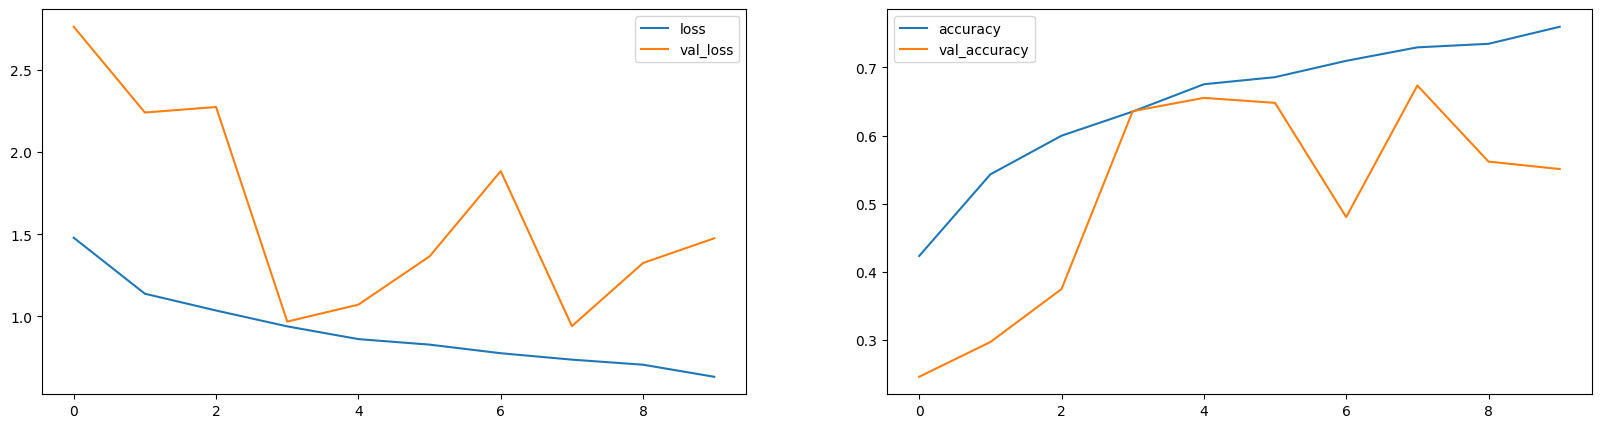

In [21]:
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
df_history = pd.DataFrame(model.history.history)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0])
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])